In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('text_with_label.csv', index_col=0)

print(df.shape)
df.head(5)

(55885, 2)


,sentence,prediction
0,twitter prior musk takeover talk directly news...,0
1,article imply state feature turn crash tesla a...,0
2,og musk duck life wall,1
3,dare speak way great powerful musk obviously d...,1
4,wait finally excuse shower douche,1


In [2]:
df.dropna(inplace=True)
df.shape

(55861, 2)

In [3]:
df['prediction'].value_counts()/df.shape[0] * 100 

0    54.966793
1    45.033207
Name: prediction, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.sentence, df.prediction, test_size=0.1, stratify=df.prediction, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

count_matrix = countvec.fit_transform(X_train)
count_array = count_matrix.toarray()
X_train = pd.DataFrame(data=count_array,columns = countvec.get_feature_names_out())

In [6]:
X_test = pd.DataFrame(data=countvec.transform(X_test).toarray(), columns=countvec.get_feature_names_out())

In [7]:
model_NB = BernoulliNB()
model_NB.fit(X_train, y_train)

BernoulliNB()

In [10]:
y_pred_NB = model_NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      3071
           1       0.76      0.98      0.85      2516

    accuracy                           0.85      5587
   macro avg       0.87      0.86      0.85      5587
weighted avg       0.88      0.85      0.85      5587



In [11]:
print(confusion_matrix(y_test, y_pred_NB))

[[2272  799]
 [  42 2474]]


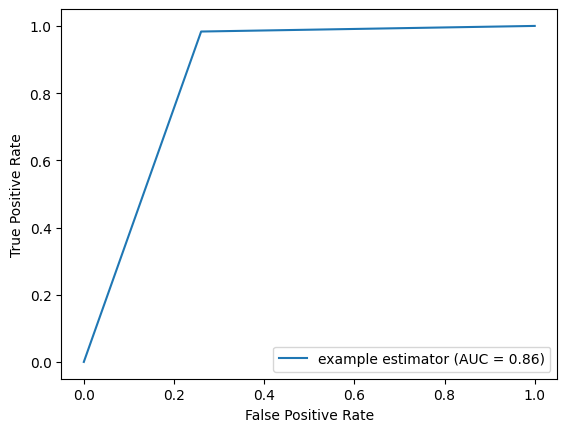

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

model_DCF = DecisionTreeClassifier(random_state=0, max_depth=5)
model_DCF.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [14]:
y_pred_DCF = model_DCF.predict(X_test)
print(classification_report(y_test, y_pred_DCF))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      3071
           1       0.64      0.72      0.68      2516

    accuracy                           0.69      5587
   macro avg       0.69      0.69      0.69      5587
weighted avg       0.70      0.69      0.69      5587



In [15]:
print(confusion_matrix(y_test, y_pred_DCF))

[[2059 1012]
 [ 716 1800]]


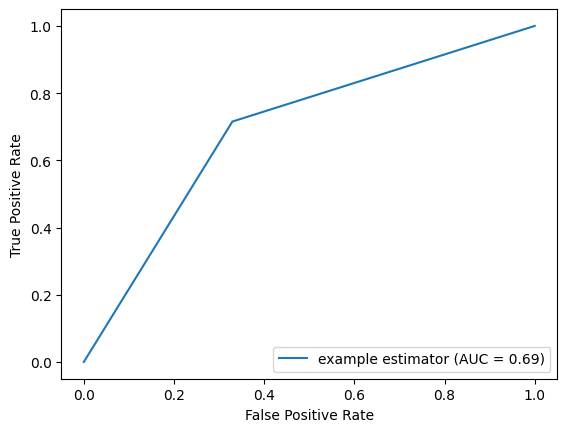

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DCF)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(
    random_state=0,
    max_depth=50
)

model_RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=0)

In [17]:
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3071
           1       0.80      0.88      0.84      2516

    accuracy                           0.85      5587
   macro avg       0.85      0.85      0.85      5587
weighted avg       0.85      0.85      0.85      5587



In [18]:
print(confusion_matrix(y_test, y_pred_RFC))

[[2504  567]
 [ 296 2220]]


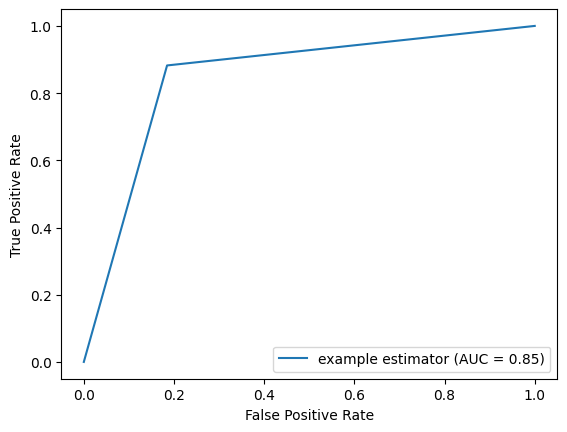

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RFC)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [9]:
from sklearn.svm import SVC

model_SVC = SVC(
    gamma='auto',
    random_state=0,
)

model_SVC.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

In [10]:
y_pred_SVC = model_SVC.predict(X_test)
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      3071
           1       0.64      0.97      0.77      2516

    accuracy                           0.74      5587
   macro avg       0.80      0.76      0.73      5587
weighted avg       0.81      0.74      0.73      5587



In [11]:
print(confusion_matrix(y_test, y_pred_SVC))

[[1682 1389]
 [  73 2443]]


In [61]:
from sklearn.metrics import accuracy_score, f1_score
import os

f1_s_svc = f1_score(y_test, y_pred_SVC)
acc_svc = accuracy_score(y_test, y_pred_SVC)

f1_s_nb = f1_score(y_test, y_pred_NB)
acc_nb = accuracy_score(y_test, y_pred_NB)

f1_s_dt = f1_score(y_test, y_pred_DCF)
acc_dt = accuracy_score(y_test, y_pred_DCF)

f1_s_rf = f1_score(y_test, y_pred_RFC)
acc_rf = accuracy_score(y_test, y_pred_RFC)

results = [
    ['SVM', f1_s_svc, acc_svc],
    ['Naive Bayes', f1_s_nb, acc_nb],
    ['Decision tree', f1_s_dt, acc_dt],
    ['Random Forest', f1_s_rf, acc_rf],
]

result_df = pd.DataFrame(data=results, columns=['name', 'f1 score', 'accuracy'])
result_df['accuracy'] = result_df['accuracy'].apply(lambda x: x*100)
result_df.to_csv(os.path.join('results','results_classic_ml.csv'))

In [5]:
result_df = pd.read_csv('results/results_classic_ml.csv', index_col=0)
result_df

,name,f1 score,accuracy
0,SVM,0.769691,73.832110
1,Naive Bayes,0.854724,84.947199
2,Decision tree,0.675676,69.071058
3,Random Forest,0.837262,84.553428


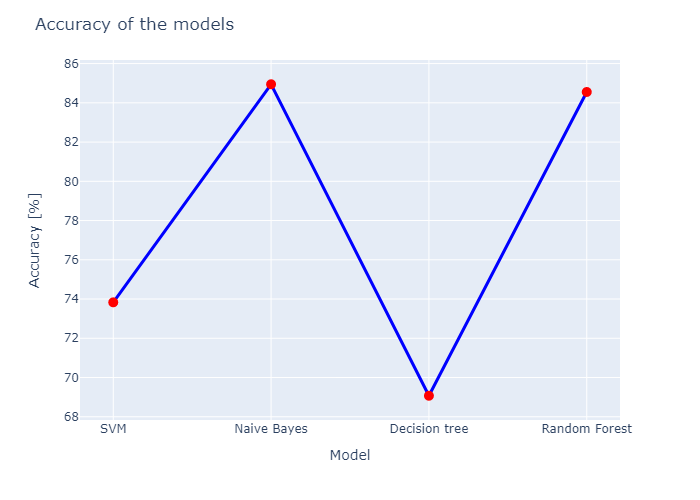

In [7]:
import plotly.express as px
fig = px.scatter(result_df, x='name', y=['accuracy'])

fig.update_traces(
    name='sample 1',
    mode='markers+lines',
    error_y=dict(color='black', width=5, thickness=1),
    marker=dict(color='red', size=10),
    line=dict(color='blue', width=3),
    showlegend=False
)

fig.update_layout(
    yaxis_title='Accuracy [%]',
    xaxis_title='Model',
    title='Accuracy of the models',
    hovermode="y"
)
fig.show("png")

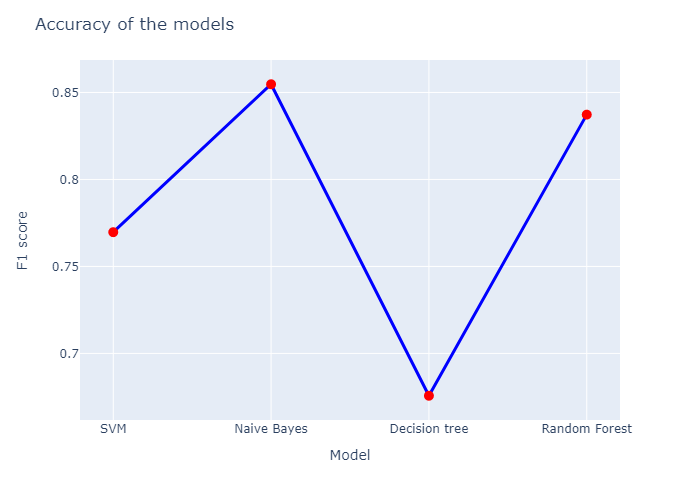

In [8]:
fig = px.scatter(result_df, x='name', y=['f1 score'])

fig.update_traces(
    name='sample 1',
    mode='markers+lines',
    error_y=dict(color='black', width=5, thickness=1),
    marker=dict(color='red', size=10),
    line=dict(color='blue', width=3),
    showlegend=False
)

fig.update_layout(
    yaxis_title='F1 score',
    xaxis_title='Model',
    title='Accuracy of the models',
    hovermode="y"
)
fig.show("png")